<a href="https://colab.research.google.com/github/aka-gera/Data_Classification/blob/main/Abalone_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis
# !ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ML2023/data-analysis
/content/drive/MyDrive/ML2023/data-analysis


# **CLASSIFIER**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

# Import the helper classes

In [261]:
!pip install AutoLogging-ML
!pip install xgboost
!pip install catboost

In [262]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots
from AutoLogging_ML import AutoLogger
import seaborn as sns

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [263]:
import warnings
from sklearn.exceptions import FitFailedWarning
# Filter out the FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [264]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information




The data is provided by: https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

# Import Dataset

In [265]:
df = aka_clean.df_get('Abalone_Dataset/abalone.csv')

In [266]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [268]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Clean Data

## Drop Duplicate data

In [269]:
df.drop_duplicates()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [270]:
df['age ranges'] = df[df.columns[-1]]
for i,xx in enumerate(df['age ranges']):
  if xx <= 5:
    df['age ranges'][i] = '0-5'
  elif xx > 5 and xx <= 10:
    df['age ranges'][i] = '5-10'
  elif xx > 10 and xx <= 15:
    df['age ranges'][i] = '10-15'
  elif xx > 15 and xx <= 20:
    df['age ranges'][i] = '15-20'
  else:
    df['age ranges'][i] = 'age>20'
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age ranges
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,10-15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,5-10
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,5-10
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,5-10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,5-10


## Swap the target and the last feature

In [271]:
df = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age ranges
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,10-15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,5-10
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,5-10
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,5-10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,5-10


## Drop feature(s)


In [272]:
feat =  [-2]
df = aka_clean.drop_feature(df,feat)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age ranges
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,10-15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,5-10
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,5-10
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,5-10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,5-10


##  Convert categorical variables into numerical representations

In [273]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age ranges
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


## Balance Dataset

In [274]:
aka_plot.plot_pie(df,-1)

In [275]:
# df = aka_clean.balance_df(df,'j')
# aka_plot.plot_pie(df, -1)

## Clean Dataset

## Correlation Matrix

In [276]:
aka_corr_an.Plot_Correlation_Matrix(df)

In [289]:

confidence_interval_limit =   [-4,4]             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .8      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

diff_shape = (df.shape[0]-df_filtered.shape[0],df.shape[1]-df_filtered.shape[1])
diff_shape,df_filtered.shape

((49, 6), (4128, 3))

## Graph the features that are highly correlated


In [290]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp),400,500,3)
if fig is not None:
    fig.show()

## Visualize the distribution of the filtered dataset

In [291]:
aka_plot.Plot_box_Features(df,df_filtered,400,500,3,range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

In [292]:
pre_proc = 'X'                             # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',

X_train, X_test, y_train, y_test = aka_learn.Learning_data(df_filtered,pre_proc)

In [293]:

r,model =AutoLogger.train_and_log_classification(X_train,y_train,X_test,y_test,size='large')
y_pred = model.predict(X_test)

In [294]:
model

LogisticRegression()

<Axes: xlabel='validation-accuracy', ylabel='model'>

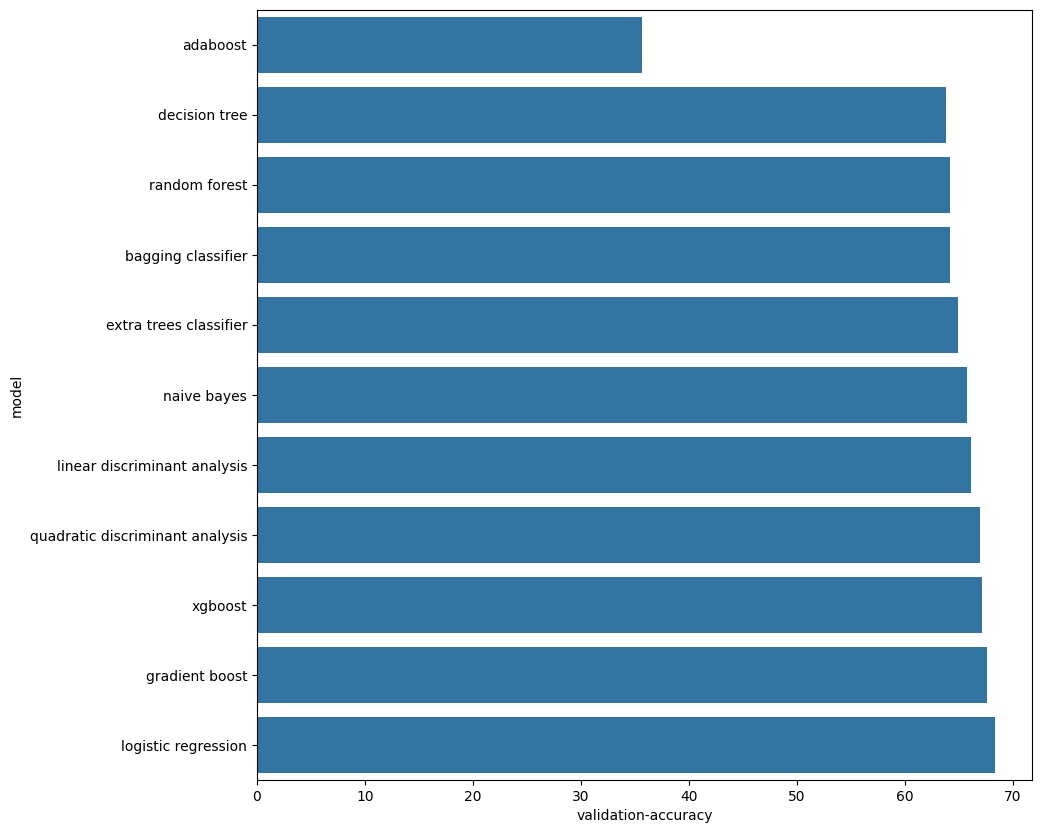

In [295]:
AutoLogger.get_metric_plot_classification(r,'validation','accuracy')

## Confusion Matrix

In [296]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
Label = [str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [297]:
Label

['0-5', '10-15', '15-20', '5-10']

In [298]:
shw = 1
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label,shw)
fig2.show()

## Classification Report

In [299]:
shw = 1
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label,shw)
fig3.show()